## This notebook hosts periodic checks that I do to verify this code is working and correct

In [1]:
import uproot
import matplotlib.pyplot as plt
from tbanalysis import helpers
import mplhep as hep
plt.style.use(hep.style.ATLAS)

In [2]:
run_number = 2420310
module = 'LBC65'
cell = 'A-3'
energy = 50000
theta = 20

In [3]:
f = uproot.open(f"../../runs/tiletb_{run_number}.root")['h1000']

In [4]:
lb_cells = [i for i in range(31)] + [i for i in range(33, 43)] + [44, 45, 46, 47]
eb_cells = [i for i in range(0, 18)] + [20, 21, 22, 23, 24, 25, 26, 27] + [30, 31, 32, 33, 34, 35]

In [5]:
mzero_a_energy = f['EfitA01'].arrays(library='np')['EfitA01'].T
mzero_c_energy = f['EfitC01'].arrays(library='np')['EfitC01'].T
lba_energy = f['EfitA02'].arrays(library='np')['EfitA02'].T
lbc_energy = f['EfitC02'].arrays(library='np')['EfitC02'].T
ebc_energy = lba_energy = f['EfitE03'].arrays(library='np')['EfitE03'].T

In [6]:
mzero_a_energy = mzero_a_energy[lb_cells]
mzero_c_energy = mzero_c_energy[lb_cells]
lba_energy = lba_energy[lb_cells]
lbc_energy = lbc_energy[lb_cells]
ebc_energy = ebc_energy[eb_cells]

mzero_a_energy = mzero_a_energy.sum(axis=0)
mzero_c_energy = mzero_c_energy.sum(axis=0)
lba_energy = lba_energy.sum(axis=0)
lbc_energy = lbc_energy.sum(axis=0)
ebc_energy = ebc_energy.sum(axis=0)

In [7]:
tot_energy = lba_energy + lbc_energy + mzero_c_energy + ebc_energy

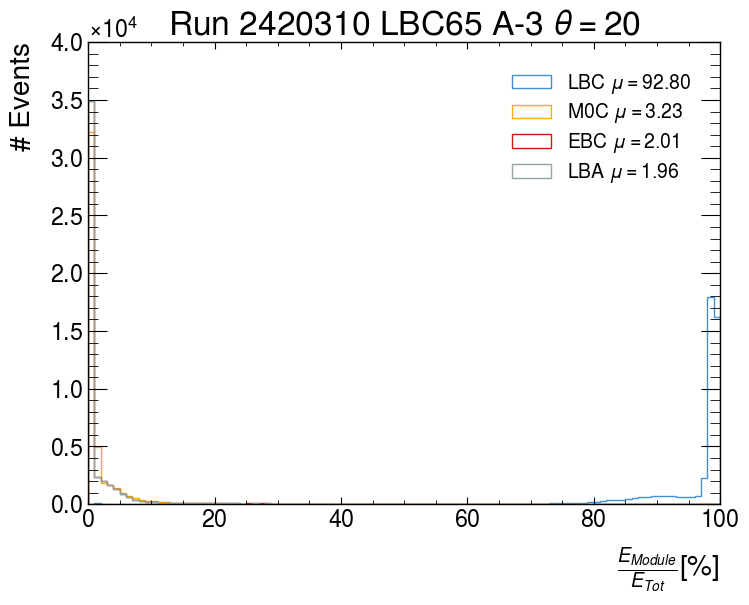

In [8]:
frac_mzeroc_e = (mzero_c_energy/ tot_energy) * 100
frac_lbc = (lbc_energy/ tot_energy) * 100
frac_lba = (lba_energy/ tot_energy) * 100
frac_ebc = (ebc_energy/ tot_energy) * 100

fig, ax = plt.subplots()
plt.hist(frac_lbc, bins=100, range=(0, 100), label='LBC $\\mu = $' + f'{frac_lbc.mean():.2f}', alpha=1, histtype='step')
plt.hist(frac_mzeroc_e, bins=100, range=(0, 100), label='M0C $\\mu = $' + f'{frac_mzeroc_e.mean():.2f}', alpha=1, histtype='step')
plt.hist(frac_ebc, bins=100, range=(0, 100), label='EBC $\\mu = $' + f'{frac_ebc.mean():.2f}', alpha=1, histtype='step')
plt.hist(frac_lba, bins=100, range=(0, 100), label='LBA $\\mu = $' + f'{frac_lba.mean():.2f}', alpha=1, histtype='step')
plt.title(f'Run {run_number} {module} {cell} ' + '$\\theta = $' + f'{theta}')
plt.xlabel('$\\frac{E_{Module}}{E_{Tot}} [\\%]$')
plt.ylabel('# Events')
#plt.text(x=0.6, y=0.7, s=f'Average of X axis = {frac_mzeroc_e.mean():.2f}%', transform=ax.transAxes, verticalalignment='top')
plt.legend()
plt.show()

### Check the distribution of Ctot and Clong for electrons

In [9]:
single_particles =  helpers.ParticleSeparator(h1000=f).single_particle_cut()
collimated_particles = helpers.ParticleSeparator(h1000=f).good_beam_trajectory()
muon_events = helpers.ParticleSeparator(h1000=f).muon_events()
df = f.arrays(library='pd')

Total events: 50030
Muon events: 3215 (6.4%)
Mean energy of muon events: 2416.6 MeV
Total events: 50030
S1 MPV (MIP): 2334.38
S2 MPV (MIP): 1771.88
Events passing cuts: 44428 (88.8%)
Total events: 50030
Events with good trajectory: 50030 (100.0%)
Beam center: x = -0.0487 mm, y = -0.0134 mm
Total events: 50030
Muon events: 3215 (6.4%)
Mean energy of muon events: 2416.6 MeV


In [10]:
single_set = set(single_particles)
collimated_set = set(collimated_particles)
muon_set = set(muon_events)

elec_had_ind = list(single_set.intersection(collimated_set).difference(muon_set))

print(f"Total events: {len(df)}")
print(f"Single particles: {len(single_particles)}")
print(f"Collimated particles: {len(collimated_particles)}")
print(f"Muon events: {len(muon_events)}")
print(f"Electron/Hadron events: {len(elec_had_ind)}")

Total events: 50030
Single particles: 44428
Collimated particles: 50030
Muon events: 3215
Electron/Hadron events: 42779


In [11]:
clong = helpers.ParticleSeparator(h1000=f).compute_clong(cell=cell, beam_energy=energy, events=elec_had_ind)
ctot = helpers.ParticleSeparator(h1000=f).compute_ctot(cell=cell, events=elec_had_ind)

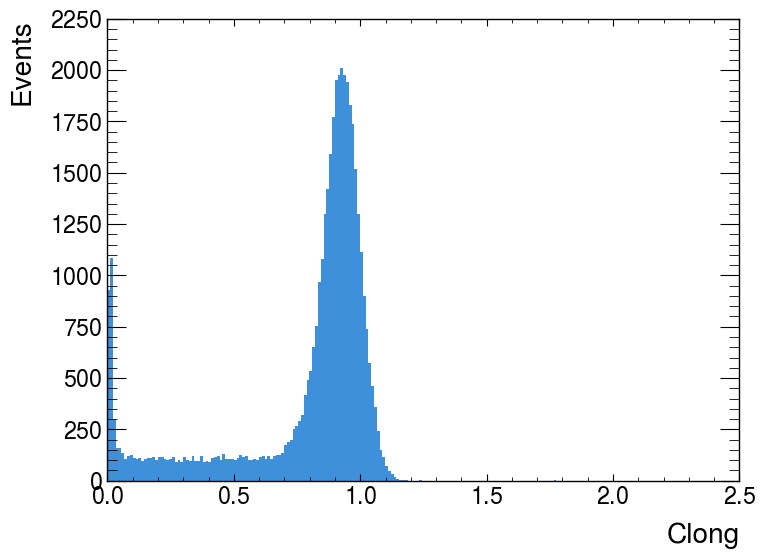

In [12]:
plt.hist(clong, bins=200, range=(0, 2.22))
plt.xlabel('Clong')
plt.ylabel('Events')
plt.show()

42779 42779 0.12978936132036553 0.782899585695588


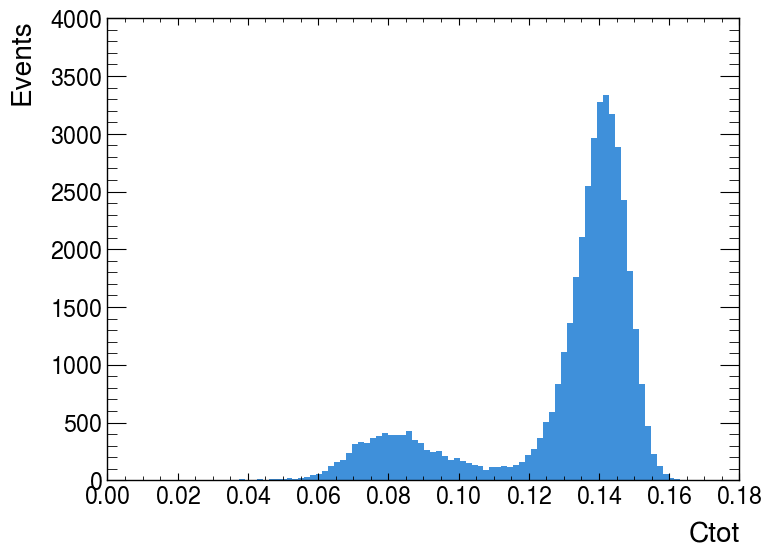

In [13]:
import numpy as np
plt.hist(ctot, bins=100, range=(0, 0.17))
print(len(ctot), len(clong), np.nanmean(a=ctot), clong.mean())

plt.xlabel('Ctot')
plt.ylabel('Events')
plt.show()

Check if I am really using the LBA / C cells for Clong

In [14]:
lba_energy = f['EfitA02'].arrays(library='np')['EfitA02'].T
lbc_energy = f['EfitC02'].arrays(library='np')['EfitC02'].T
mzeroc_energy = f['EfitC01'].arrays(library='np')['EfitC01'].T
ebc_energy = f['EfitE03'].arrays(library='np')['EfitE03'].T
lb_cells = [5, 8, 9, 10, 15, 18]
eb_cells = [6, 7, 11, 10, 1]

lb_cells = [5, 8, 9, 10, 15, 18, 6, 7, 11, 12, 16, 17, 13, 14, 25, 26]
eb_cells = [6, 7, 11, 10, 8, 9, 14, 15, 4, 5, 2, 3, 16, 17, 1]

lba_energy = lba_energy[lb_cells].sum(axis=0)
lbc_energy = lbc_energy[lb_cells].sum(axis=0)
mzeroc_energy = mzeroc_energy[lb_cells].sum(axis=0)
ebc_energy = ebc_energy[eb_cells].sum(axis=0)

In [15]:
tot_energy = lbc_energy + mzero_c_energy + ebc_energy + lba_energy
tot_energy_gev = tot_energy / 1000 #1000 - MEV * 10 -Beam energy

44.492744


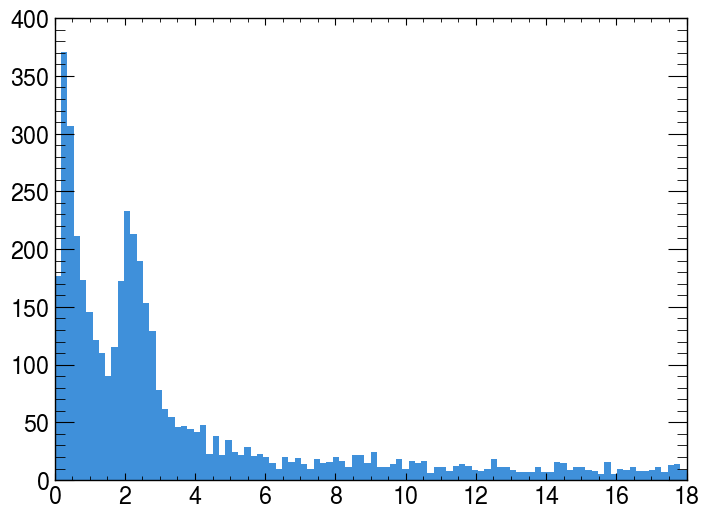

In [16]:
plt.hist(tot_energy_gev, bins=100, range=(0, 18))
print(tot_energy_gev.mean())
plt.show()

In [17]:
lbc_energy = f['EfitC02'].arrays(library='np')['EfitC02'].T
mzeroc_energy = f['EfitC01'].arrays(library='np')['EfitC01'].T
ebc_energy = f['EfitE03'].arrays(library='np')['EfitE03'].T
lb_cells = [5, 8, 9, 10, 15, 18, 6, 7, 11, 12, 16, 17, 13, 14, 25, 26]
eb_cells = [6, 7, 11, 10, 1]
eb_cells = [6, 7, 10, 11, 8, 9, 14, 15, 4, 5, 2, 3, 16, 17, 1]


#lb_cells = [5, 8, 9, 10, 15, 18, 6, 7, 11, 12, 16, 17, 13, 14, 25, 26]
#eb_cells = [6, 7, 11, 10, 8, 9, 14, 15, 4, 5, 2, 3, 16, 17, 1]

lbc_energy = lbc_energy[lb_cells].sum(axis=0)
mzeroc_energy = mzeroc_energy[lb_cells].sum(axis=0)
ebc_energy = ebc_energy[eb_cells].sum(axis=0)

tot_energy = lbc_energy + mzeroc_energy + ebc_energy
tot_energy_gev = tot_energy / 10000 #1000 - MEV * 10 -Beam energy

ctot = helpers.get_ctot(cell='A3', ctot_cell_energy=tot_energy_gev)

In [18]:
print(lbc_energy[0] + mzeroc_energy[0] + ebc_energy[0])
print(tot_energy[0])

48601.535
48601.535


In [19]:
tot_energy

array([48601.535, 47717.68 , 50529.07 , ..., 54115.93 , 47823.16 ,
       50354.89 ], shape=(50030,), dtype=float32)

In [20]:
tot_energy

array([48601.535, 47717.68 , 50529.07 , ..., 54115.93 , 47823.16 ,
       50354.89 ], shape=(50030,), dtype=float32)

In [21]:
lbc_energy = f['EfitC02'].arrays(library='np')['EfitC02'].T
mzeroc_energy = f['EfitC01'].arrays(library='np')['EfitC01'].T
ebc_energy = f['EfitE03'].arrays(library='np')['EfitE03'].T
lb_cells = [5, 8, 9, 10, 15, 18, 6, 7, 11, 12, 16, 17, 13, 14, 25, 26]
eb_cells = [6, 7, 11, 10, 1]
eb_cells = [6, 7, 10, 11, 8, 9, 14, 15, 4, 5, 2, 3, 16, 17, 1]

#lb_cells = [5, 8, 9, 10, 15, 18, 6, 7, 11, 12, 16, 17, 13, 14, 25, 26]
#eb_cells = [6, 7, 11, 10, 8, 9, 14, 15, 4, 5, 2, 3, 16, 17, 1]
lb_cells = [5,8]
eb_cells = [6,7]


lbc_energy = lbc_energy[lb_cells]
mzeroc_energy = mzeroc_energy[lb_cells]
ebc_energy = ebc_energy[eb_cells]

#tot_energy = lbc_energy + mzeroc_energy + ebc_energy
#tot_energy_gev = tot_energy / 10000 #1000 - MEV * 10 -Beam energy

ctot = helpers.ParticleSeparator(h1000=f).compute_ctot(cell='A3', events=[0])

Check Xcha1_0, Ycha1_0 distributions

In [22]:
xcha = f['Xcha1_0'].arrays(library='np')['Xcha1_0']
ycha = f['Ycha1_0'].arrays(library='np')['Ycha1_0']

Xcha1_0 min:  -4600.421 Xcha1_0 mean:  -48.690544 Xcha1_0 max:  4564.11
Ycha1_0 min:  -4849.839 Ycha1_0 mean:  -13.350452 Ycha1_0 max:  4841.908


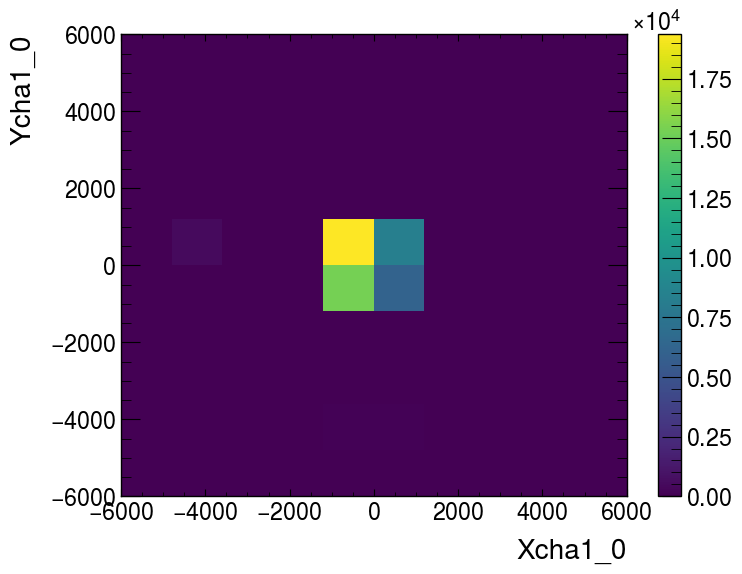

In [23]:
plt.hist2d(xcha, ycha, range=[[-6000, 6000],[-6000, 6000]])
plt.xlabel('Xcha1_0')
plt.ylabel('Ycha1_0')
print('Xcha1_0 min: ', xcha.min(), 'Xcha1_0 mean: ', xcha.mean(), 'Xcha1_0 max: ', xcha.max())
print('Ycha1_0 min: ', ycha.min(), 'Ycha1_0 mean: ', ycha.mean(), 'Ycha1_0 max: ', ycha.max())
plt.colorbar()
plt.show()

In [24]:
xcha.min(), xcha.max(), xcha.mean()

(np.float32(-4600.421), np.float32(4564.11), np.float32(-48.690544))

Check total energy deposit in 2420313 run

In [25]:
lb_cells = [i for i in range(31)] + [i for i in range(33, 43)] + [44, 45, 46, 47]
eb_cells = [i for i in range(0, 18)] + [20, 21, 22, 23, 24, 25, 26, 27] + [30, 31, 32, 33, 34, 35]


lba_energy = f['EfitA02'].arrays(library='np')['EfitA02'].T[lb_cells]
lbc_energy = f['EfitC02'].arrays(library='np')['EfitC02'].T[lb_cells]
ebc_energy = f['EfitE03'].arrays(library='np')['EfitE03'].T[eb_cells]
mzeroc_energy = f['EfitC01'].arrays(library='np')['EfitC01'].T[lb_cells]

lba_energy = helpers.mask_negative_energy(lba_energy).sum(axis=0)
lbc_energy = helpers.mask_negative_energy(lbc_energy).sum(axis=0)
ebc_energy = helpers.mask_negative_energy(ebc_energy).sum(axis=0)
mzeroc_energy = helpers.mask_negative_energy(mzeroc_energy).sum(axis=0)

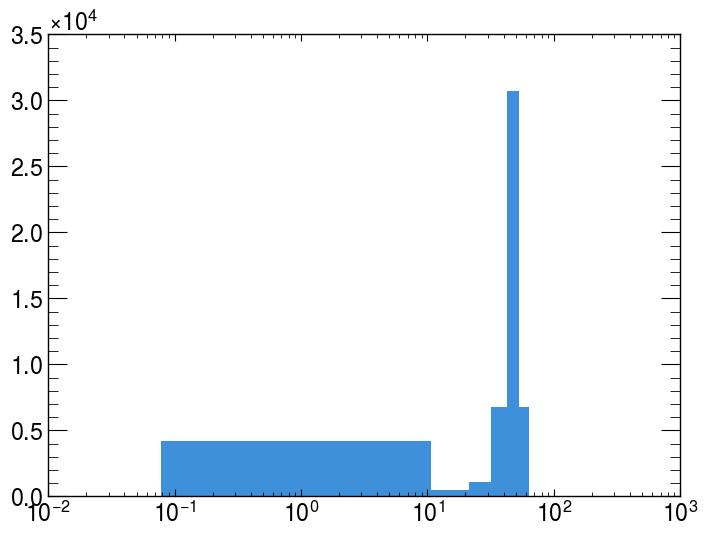

In [26]:
plt.hist(lbc_energy/1000)
plt.xscale('log')

## To develop elliptic cut function

In [27]:
clong = helpers.ParticleSeparator(h1000=f).compute_clong(cell=cell, beam_energy=energy, events=elec_had_ind)
ctot = helpers.ParticleSeparator(h1000=f).compute_ctot(cell=cell, events=elec_had_ind)

In [28]:
len(clong), len(ctot), len(elec_had_ind)

(42779, 42779, 42779)

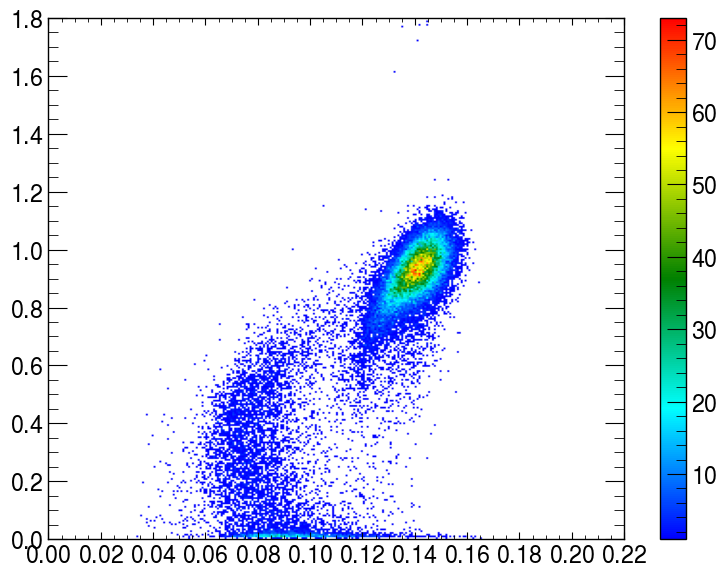

In [29]:
helpers.root_like_histogram(x=ctot, y=clong, xmin=0, xmax=0.22, ymin=0, ymax=1.8, n_xbins=300, n_ybins=300, x_inc=0.02, y_inc=0.2)

#ellipse defn. Following Siruansh - https://indico.cern.ch/event/1293030/contributions/5436570/attachments/2665654/4619155/TB%20week%2014%20June.pdf
h, k = 0.14, 0.9 # center of electron ellipse. clong, ctot
a, b = 0.05, 0.3 #semi major, semi minor

el_clong, el_ctot, el_ind = [], [], []
for i, index in enumerate(elec_had_ind):
    c_t = ctot[i]
    c_l = clong[i]
    lhs = ((c_t - h)/a) ** 2 + ((c_l - k)/b) ** 2
    #area inside ellipse
    if lhs <= 1:
        el_clong.append(c_l)
        el_ctot.append(c_t)
        el_ind.append(i)

(<Figure size 800x600 with 2 Axes>, <Axes: >, 34251)

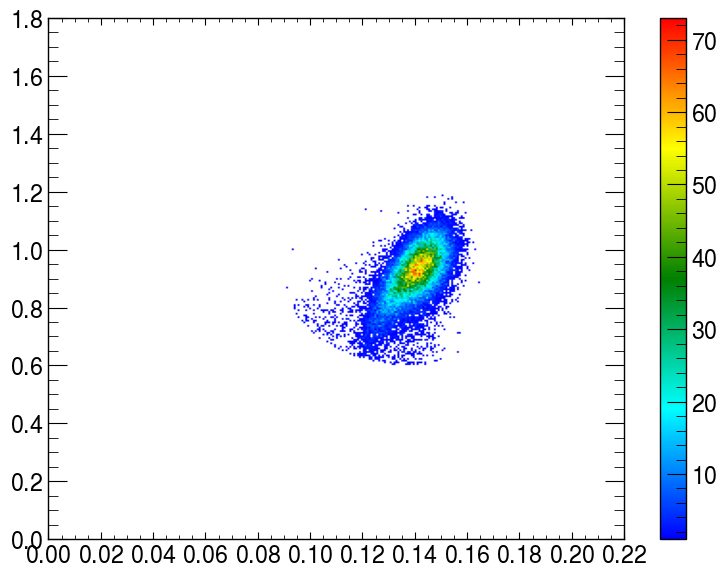

In [30]:
#Manual elliptical cut
helpers.root_like_histogram(x=el_ctot, y=el_clong, xmin=0, xmax=0.22, ymin=0, ymax=1.8, n_xbins=300, n_ybins=300, x_inc=0.02, y_inc=0.2)

Events analyzed: 42779
Electron events (elliptical cut): 34251 (80.1%)
Ellipse center (Ctot, Clong): (0.14, 0.9)
Ellipse axes (a, b): (0.05, 0.3)


(<Figure size 800x600 with 2 Axes>, <Axes: >, 34251)

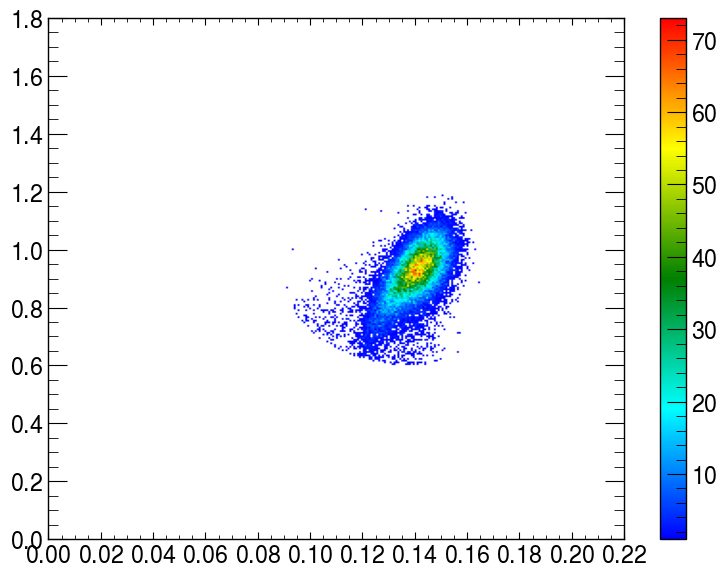

In [31]:
# method elliptical cut
electron_indices = helpers.ParticleSeparator(h1000=f).pure_electron_events(cell='A3', ctot=ctot, clong=clong, elec_had_indices=elec_had_ind)
el_ctot = helpers.ParticleSeparator(h1000=f).compute_ctot(cell='A3', events=electron_indices)
el_clong = helpers.ParticleSeparator(h1000=f).compute_clong(cell='A3', beam_energy=energy, events=electron_indices)
helpers.root_like_histogram(x=el_ctot, y=el_clong, xmin=0, xmax=0.22, ymin=0, ymax=1.8, n_xbins=300, n_ybins=300, x_inc=0.02, y_inc=0.2)